In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mplf
from stocktrends import Renko

In [3]:
df = yf.download(tickers='ETH-USD' , start='2023-01-10')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-10,1321.395508,1342.757202,1318.527222,1336.586060,1336.586060,5830173253
2023-01-11,1336.486816,1387.932739,1323.583130,1387.932739,1387.932739,6314904311
2023-01-12,1405.351440,1432.281250,1378.422119,1417.938477,1417.938477,12230193038
2023-01-13,1417.946167,1461.672729,1404.023926,1451.614868,1451.614868,7684148212
2023-01-14,1451.428467,1563.739136,1450.988403,1550.706909,1550.706909,15444626014
...,...,...,...,...,...,...
2024-01-06,2269.540039,2271.359375,2219.781982,2241.624756,2241.624756,5970741680
2024-01-07,2242.012695,2257.127930,2211.562500,2222.865967,2222.865967,6490053615
2024-01-08,2222.857666,2358.815674,2171.993652,2333.032715,2333.032715,13830287095


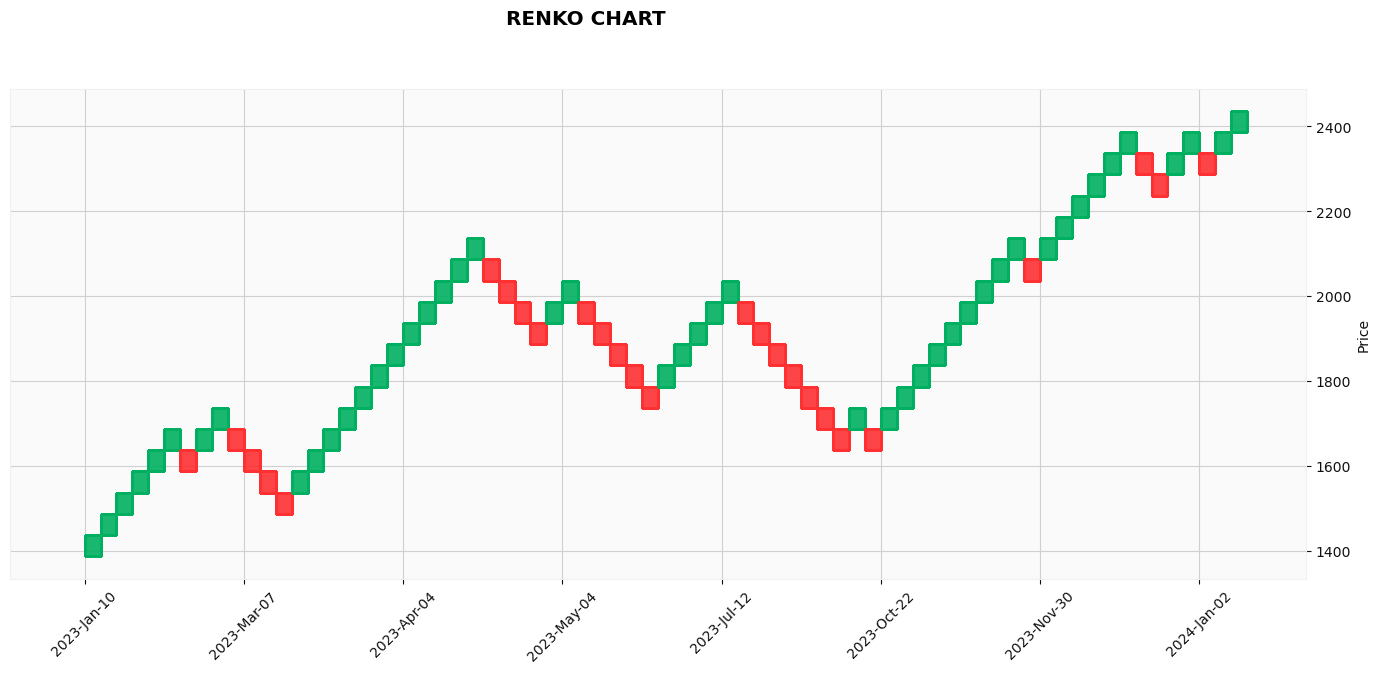

In [6]:
mplf.plot(df,type='renko',renko_params=dict(brick_size=50),style='yahoo',figsize=(18,7),title='RENKO CHART')

In [7]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L'] = abs(df['High'] - df['Low'])
    df['H-PC']= abs(df['High'] - df['Close'].shift(1))
    df['L-PC']= abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L' , 'H-PC' , 'L-PC']].max(axis=1 , skipna=False)
    df['ATR']=df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L' , 'H-PC' , 'L-PC'] , axis=1)
    return df2

In [8]:
def renko_DF(DF):
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.iloc[:,[0,1,2,3,5,6]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low",
                         "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data()
    return renko_df

In [10]:
renko_DF(df)

,date,open,high,low,close,uptrend
0,2023-01-10,1260.0,1330.0,1260.0,1330.0,True
1,2023-01-12,1330.0,1400.0,1330.0,1400.0,True
2,2023-01-14,1400.0,1470.0,1400.0,1470.0,True
3,2023-01-14,1470.0,1540.0,1470.0,1540.0,True
4,2023-01-20,1540.0,1610.0,1540.0,1610.0,True
5,2023-02-17,1610.0,1680.0,1610.0,1680.0,True
6,2023-03-08,1610.0,1610.0,1540.0,1540.0,False
7,2023-03-09,1540.0,1540.0,1470.0,1470.0,False
8,2023-03-13,1540.0,1610.0,1540.0,1610.0,True
9,2023-03-13,1610.0,1680.0,1610.0,1680.0,True
